In [26]:
import pandas as pd
df = pd.read_csv("survey_results_public.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [27]:
df.info()
df.shape
df.describe(include='all')
df.isna().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


AINextMuch less integrated    64289
AINextLess integrated         63082
AINextNo change               52939
AINextMuch more integrated    51999
EmbeddedAdmired               48704
                              ...  
MainBranch                        0
Check                             0
Employment                        0
Age                               0
ResponseId                        0
Length: 114, dtype: int64

In [28]:
import numpy as np
import pandas as pd

# Clean experience fields
def clean_experience(x):
    if pd.isna(x): return np.nan
    x = str(x).lower().strip()

    if "less than" in x:
        return 0.5
    if "more than" in x:
        # keep numeric portion
        num = ''.join([c for c in x if c.isdigit()])
        return float(num) if num else np.nan

    # remove non-numeric
    cleaned = ''.join([c for c in x if c.isdigit() or c == '.'])
    return float(cleaned) if cleaned else np.nan

for col in ["YearsCode", "YearsCodePro", "WorkExp"]:
    if col in df.columns:
        df[col + "_clean"] = df[col].apply(clean_experience)


In [29]:
# Identify string columns
str_cols = df.select_dtypes(include='object').columns

# Trim spaces
df[str_cols] = df[str_cols].apply(lambda col: col.str.strip() if col.dtype == "object" else col)

# Optional: fix unicode issues (Smart quotes, weird apostrophes)
df[str_cols] = df[str_cols].apply(lambda col: col.str.replace("â€™", "'", regex=False))


In [30]:
multi_select_cols = [
    col for col in df.columns
    if df[col].astype(str).str.contains(';').any()
]

multi_select_cols


['Employment',
 'CodingActivities',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'BuyNewTool',
 'TechEndorse',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHaveWorkedWith',
 'OfficeStackAsyncWantToWorkWith',
 'OfficeStackAsyncAdmired',
 'OfficeStackSyncHaveWorkedWith',
 'OfficeStackSyncWantToWorkWith',
 'OfficeStackSyncAdmired',
 'AISearchDevHaveWorkedWith',
 'A

In [31]:
def split_multi(x):
    if pd.isna(x): 
        return []
    return [item.strip() for item in str(x).split(';') if item.strip()]

for col in multi_select_cols:
    df[col + "_list"] = df[col].apply(split_multi)


C:\Users\deepa\AppData\Local\Temp\ipykernel_12460\2382845035.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "_list"] = df[col].apply(split_multi)
C:\Users\deepa\AppData\Local\Temp\ipykernel_12460\2382845035.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + "_list"] = df[col].apply(split_multi)
C:\Users\deepa\AppData\Local\Temp\ipykernel_12460\2382845035.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  

In [32]:
cols_with_lists = []

for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, list)).any():
        cols_with_lists.append(col)

cols_with_lists

['Employment_list',
 'CodingActivities_list',
 'LearnCode_list',
 'LearnCodeOnline_list',
 'TechDoc_list',
 'BuyNewTool_list',
 'TechEndorse_list',
 'LanguageHaveWorkedWith_list',
 'LanguageWantToWorkWith_list',
 'LanguageAdmired_list',
 'DatabaseHaveWorkedWith_list',
 'DatabaseWantToWorkWith_list',
 'DatabaseAdmired_list',
 'PlatformHaveWorkedWith_list',
 'PlatformWantToWorkWith_list',
 'PlatformAdmired_list',
 'WebframeHaveWorkedWith_list',
 'WebframeWantToWorkWith_list',
 'WebframeAdmired_list',
 'EmbeddedHaveWorkedWith_list',
 'EmbeddedWantToWorkWith_list',
 'EmbeddedAdmired_list',
 'MiscTechHaveWorkedWith_list',
 'MiscTechWantToWorkWith_list',
 'MiscTechAdmired_list',
 'ToolsTechHaveWorkedWith_list',
 'ToolsTechWantToWorkWith_list',
 'ToolsTechAdmired_list',
 'NEWCollabToolsHaveWorkedWith_list',
 'NEWCollabToolsWantToWorkWith_list',
 'NEWCollabToolsAdmired_list',
 'OpSysPersonal use_list',
 'OpSysProfessional use_list',
 'OfficeStackAsyncHaveWorkedWith_list',
 'OfficeStackAsyncWan

In [33]:
non_multi_cols = [
    col for col in df.select_dtypes(include='object').columns
    if col not in multi_select_cols and col not in cols_with_lists
]
non_multi_cols

['MainBranch',
 'Age',
 'RemoteWork',
 'Check',
 'EdLevel',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuildvsBuy',
 'Country',
 'Currency',
 'SOVisitFreq',
 'SOAccount',
 'SOPartFreq',
 'SOComm',
 'AISelect',
 'AISent',
 'AIAcc',
 'AIComplex',
 'AIThreat',
 'TBranch',
 'ICorPM',
 'Knowledge_1',
 'Knowledge_2',
 'Knowledge_3',
 'Knowledge_4',
 'Knowledge_5',
 'Knowledge_6',
 'Knowledge_7',
 'Knowledge_8',
 'Knowledge_9',
 'Frequency_1',
 'Frequency_2',
 'Frequency_3',
 'TimeSearching',
 'TimeAnswering',
 'ProfessionalCloud',
 'ProfessionalQuestion',
 'Industry',
 'SurveyLength',
 'SurveyEase']

In [34]:
df[non_multi_cols] = df[non_multi_cols].astype('category')

<Axes: >

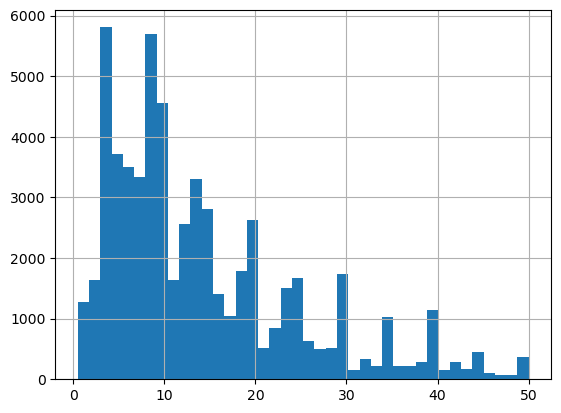

In [35]:
df['YearsCode_clean'].hist(bins=40)

<Axes: xlabel='YearsCode_clean', ylabel='YearsCodePro_clean'>

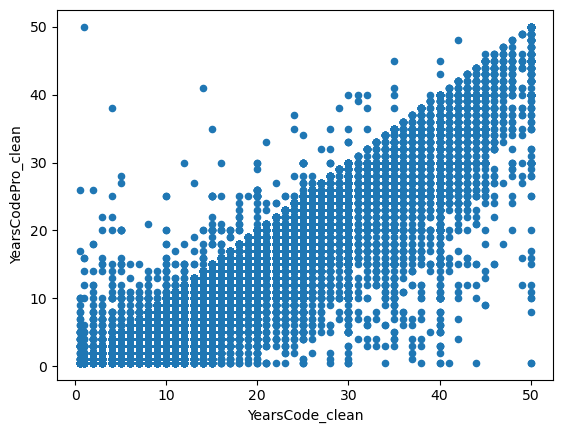

In [36]:
df.plot(kind='scatter', x='YearsCode_clean', y='YearsCodePro_clean')

<Axes: ylabel='JobSat'>

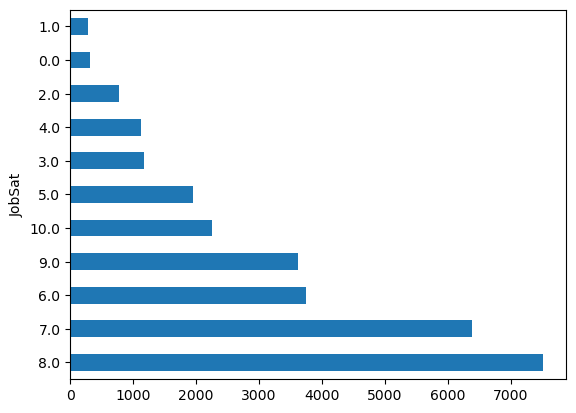

In [37]:
df['JobSat'].value_counts().plot(kind='barh')

In [38]:
current_lang = df.explode("LanguageHaveWorkedWith_list")
future_lang = df.explode("LanguageWantToWorkWith_list")

current = current_lang["LanguageHaveWorkedWith_list"].value_counts()
future = future_lang["LanguageWantToWorkWith_list"].value_counts()

tech_momentum = (future - current).sort_values(ascending=False)
tech_momentum.head(10)


Rust       9673
Go         5734
Zig        3021
Kotlin     1714
Elixir     1652
Swift      1048
Haskell    1028
F#          760
OCaml       622
Erlang      615
Name: count, dtype: int64

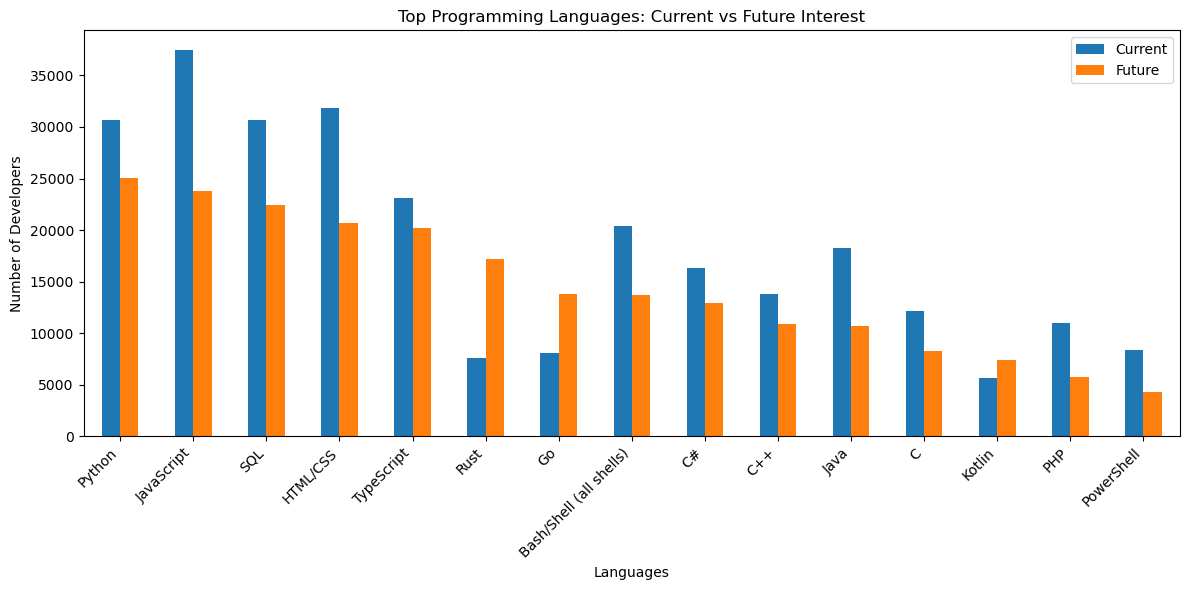

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explode both lists
current_lang = df.explode("LanguageHaveWorkedWith_list")
future_lang  = df.explode("LanguageWantToWorkWith_list")

# Count frequencies
current_counts = current_lang["LanguageHaveWorkedWith_list"].value_counts()
future_counts  = future_lang["LanguageWantToWorkWith_list"].value_counts()

# Combine into a single dataframe
lang_compare = pd.DataFrame({
    "Current": current_counts,
    "Future": future_counts
}).fillna(0).astype(int)

# Select top N languages by either current or future interest
topN = 15
lang_top = lang_compare.sort_values(by="Future", ascending=False).head(topN)

# Plot side-by-side bar chart
lang_top.plot(kind="bar", figsize=(12,6))
plt.title("Top Programming Languages: Current vs Future Interest")
plt.xlabel("Languages")
plt.ylabel("Number of Developers")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [40]:
df["AI_Using_Binary"] = df["AIToolCurrently Using_list"].apply(lambda x: 1 if len(x) > 0 else 0)

C:\Users\deepa\AppData\Local\Temp\ipykernel_12460\460714102.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["AI_Using_Binary"] = df["AIToolCurrently Using_list"].apply(lambda x: 1 if len(x) > 0 else 0)


In [41]:
df["Num_Langs"] = df["LanguageHaveWorkedWith_list"].apply(len)
df["Num_AI_Tools_Interested"] = df["AIToolInterested in Using_list"].apply(len)


C:\Users\deepa\AppData\Local\Temp\ipykernel_12460\3488678223.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Num_Langs"] = df["LanguageHaveWorkedWith_list"].apply(len)
C:\Users\deepa\AppData\Local\Temp\ipykernel_12460\3488678223.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Num_AI_Tools_Interested"] = df["AIToolInterested in Using_list"].apply(len)


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Target variable
df["AI_Using_Binary"] = df["AIToolCurrently Using_list"].apply(lambda x: 1 if len(x) > 0 else 0)

y = df["AI_Using_Binary"]

# Select features
features = [
    "YearsCode_clean", "YearsCodePro_clean", "WorkExp_clean", "Age",
    "Country", "DevType", "EdLevel", "Employment", "RemoteWork",
    "AISent", "AIAcc", "AIBen", "AIComplex",
    "Num_Langs", "Num_AI_Tools_Interested"
]

X = df[features]
 # Convert categorical columns to string (object) so fillna works

for col in X.select_dtypes(include='category').columns:
    X[col] = X[col].astype(str)

# Handling missing values
X = X.fillna("Unknown")

# Identify categorical columns
#cat_cols = X.select_dtypes(include=['object', 'category']).columns
#num_cols = X.select_dtypes(include=['int', 'float']).columns

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns

X[num_cols] = X[num_cols].fillna(-1)

# Convert to string just to be safe
X[cat_cols] = X[cat_cols].astype(str)

# Fill missing categorical values
X[cat_cols] = X[cat_cols].fillna("Unknown")

# Preprocessing
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

# Random Forest pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        class_weight='balanced'
    ))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Fit model
rf_pipeline.fit(X_train, y_train)

# Predictions
y_pred = rf_pipeline.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

acc, prec, rec, f1, cm


C:\Users\deepa\AppData\Local\Temp\ipykernel_12460\3545347970.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str)
C:\Users\deepa\AppData\Local\Temp\ipykernel_12460\3545347970.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str)
C:\Users\deepa\AppData\Local\Temp\ipykernel_12460\3545347970.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

(0.9696210268948655,
 0.9500489715964741,
 0.9956660583941606,
 0.972322771064209,
 array([[7133,  459],
        [  38, 8730]], dtype=int64))

In [45]:
sample = X.iloc[[0]].copy()

sample.loc[:, :] = None

sample["YearsCode_clean"] = 10
sample["YearsCodePro_clean"] = 8
sample["WorkExp_clean"] = 8
sample["Age"] = "35-44 years old"
sample["Country"] = "India"
sample["DevType"] = "Developer, full-stack"
sample["EdLevel"] = "Bachelor's degree"
sample["Employment"] = "Employed, full-time"
sample["RemoteWork"] = "Remote"
sample["AISent"] = "Very favorable"
sample["AIAcc"] = "Somewhat trust"
sample["AIBen"] = "Increase productivity"
sample["AIComplex"] = "Good, but not great at handling complex tasks"
sample["Num_Langs"] = 5
sample["Num_AI_Tools_Interested"] = 2

sample[num_cols] = sample[num_cols].apply(pd.to_numeric, errors="coerce")
sample[num_cols] = sample[num_cols].fillna(-1)

sample[cat_cols] = sample[cat_cols].astype(str)
sample[cat_cols] = sample[cat_cols].fillna("Unknown")


prediction = rf_pipeline.predict(sample)
prediction

prediction_proba = rf_pipeline.predict_proba(sample)
prediction_proba

C:\Users\deepa\AppData\Local\Temp\ipykernel_12460\4220847124.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sample.loc[:, :] = None
C:\Users\deepa\AppData\Local\Temp\ipykernel_12460\4220847124.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sample.loc[:, :] = None


array([[0.01333333, 0.98666667]])

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
cm


array([[7133,  459],
       [  38, 8730]], dtype=int64)

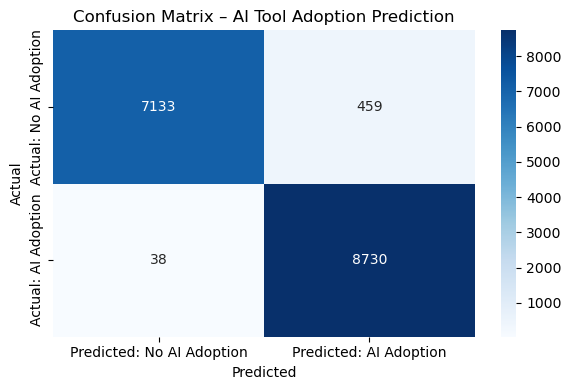

In [47]:
plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Predicted: No AI Adoption", "Predicted: AI Adoption"],
    yticklabels=["Actual: No AI Adoption", "Actual: AI Adoption"]
)

plt.title("Confusion Matrix – AI Tool Adoption Prediction")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()


In [48]:
# Get trained model
rf_model = rf_pipeline.named_steps["model"]

# Get preprocessor
preprocessor = rf_pipeline.named_steps["preprocess"]

# Get feature names
cat_features = preprocessor.transformers_[0][2]
num_features = preprocessor.transformers_[1][2]

# Get one-hot encoded feature names
encoded_cat_features = preprocessor.transformers_[0][1].get_feature_names_out(cat_features)

# Combine feature names
all_feature_names = list(encoded_cat_features) + list(num_features)


In [49]:
import pandas as pd

feature_importance = pd.DataFrame({
    "Feature": all_feature_names,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance.head(15)


,Feature,Importance
505,AIAcc_nan,0.171561
617,AIBen_Unknown,0.156766
623,AIComplex_nan,0.146983
625,Num_AI_Tools_Interested,0.130355
499,AISent_nan,0.059594
504,AIAcc_Somewhat trust,0.030975
618,AIComplex_Bad at handling complex tasks,0.025720
619,"AIComplex_Good, but not great at handling comp...",0.024614
493,AISent_Favorable,0.023648
503,AIAcc_Somewhat distrust,0.016156


C:\Users\deepa\AppData\Local\Temp\ipykernel_12460\3321297261.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


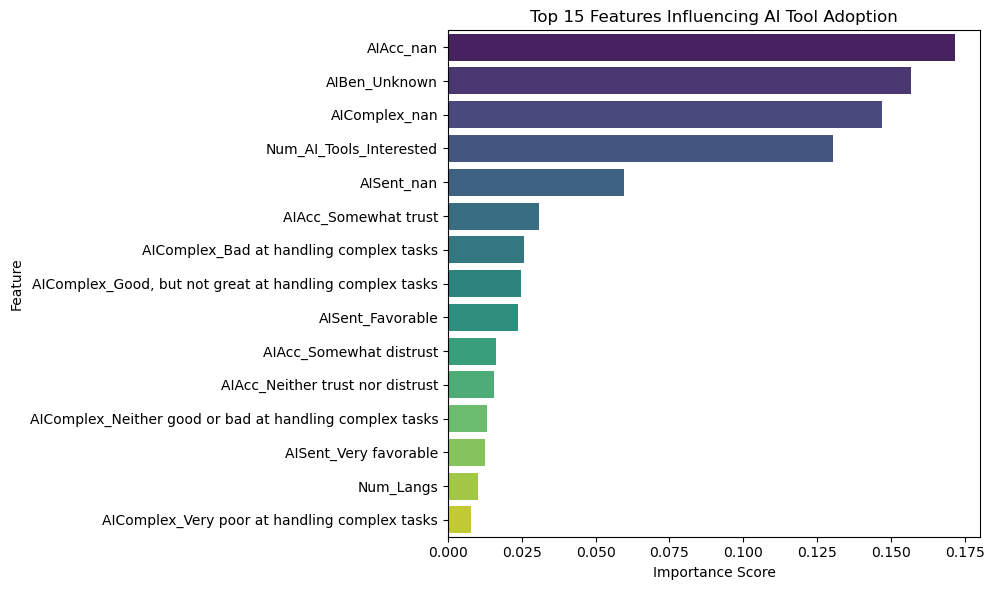

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=feature_importance.head(15),
    x="Importance",
    y="Feature",
    palette="viridis"
)

plt.title("Top 15 Features Influencing AI Tool Adoption")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
